## NEURAL NETWORKS

## IMPORTING MAJOR LIBRARIES

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, Activation, Dropout

In [18]:
train = pd.read_csv(r"C:\module10\train_clean.csv")
test = pd.read_csv(r"C:\module10\test_clean.csv")

In [19]:
train

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536,Rev,0
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053,Miss,0
888,22.0,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607,Miss,3
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369,Mr,0


In [20]:
test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,Mr,0
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,Mrs,1
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,Mr,0
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,Mr,0
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298,Mrs,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.0,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,Mr,0
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,Mrs,0
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,Mr,0
416,30.0,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,Mr,0


## PREPROCESSING

In [22]:
df = pd.concat([train, test], axis = 0, sort = True)

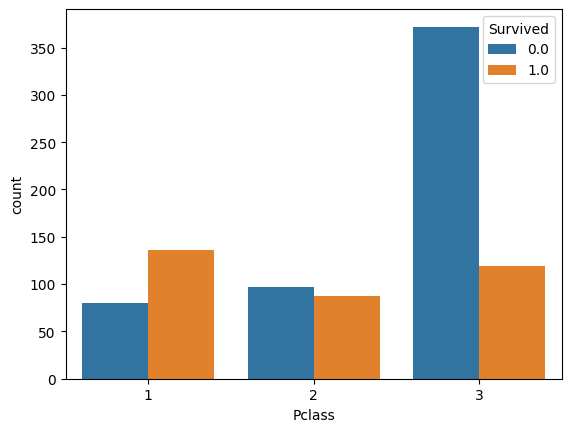

In [23]:
sns.countplot(x = 'Pclass', data = df, hue = 'Survived')
plt.show()

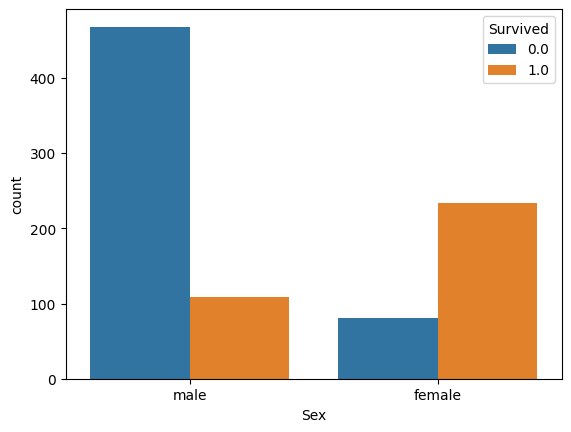

In [24]:
sns.countplot(x = 'Sex', data = df, hue = 'Survived')
plt.show()

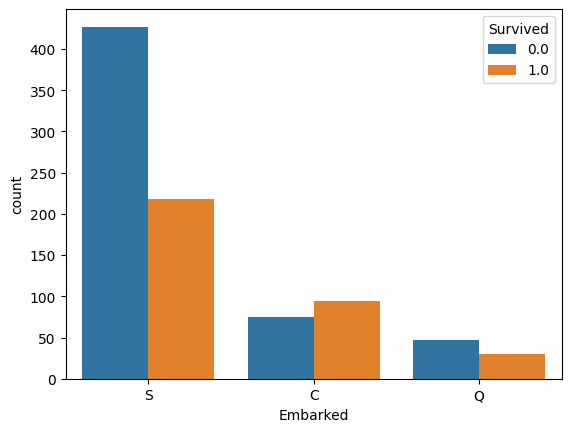

In [25]:
sns.countplot(x = 'Embarked', data = df, hue = 'Survived')
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1309 non-null   object 
 3   Family_Size  1309 non-null   int64  
 4   Fare         1309 non-null   float64
 5   Name         1309 non-null   object 
 6   Parch        1309 non-null   int64  
 7   PassengerId  1309 non-null   int64  
 8   Pclass       1309 non-null   int64  
 9   Sex          1309 non-null   object 
 10  SibSp        1309 non-null   int64  
 11  Survived     891 non-null    float64
 12  Ticket       1309 non-null   object 
 13  Title        1309 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


In [27]:
df['Sex'] = df['Sex'].astype('category')

In [28]:
df['Sex'] = df['Sex'].cat.codes

In [34]:
categorical = ['Embarked', 'Title']

for var in categorical:
    df = pd.concat([df,pd.get_dummies(df[var], prefix = var)], axis = 1)
    del df[var]

In [42]:
df

,Age,Cabin,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,NaN,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,A/5 21171,False,False,True,False,False,False,True,False,False
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,PC 17599,True,False,False,False,False,False,False,True,False
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,...,STON/O2. 3101282,False,False,True,False,False,True,False,False,False
3,35.0,C123,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,...,113803,False,False,True,False,False,False,False,True,False
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,373450,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.0,NaN,0,8.0500,"Spector, Mr. Woolf",0,1305,3,1,0,...,A.5. 3236,False,False,True,False,False,False,True,False,False
414,39.0,C105,0,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,0,0,...,PC 17758,True,False,False,False,False,False,False,True,False
415,38.5,NaN,0,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,1,0,...,SOTON/O.Q. 3101262,False,False,True,False,False,False,True,False,False
416,30.0,NaN,0,8.0500,"Ware, Mr. Frederick",0,1308,3,1,0,...,359309,False,False,True,False,False,False,True,False,False


In [44]:
df.drop(['Cabin','Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)

In [46]:
df

,Age,Family_Size,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,1,7.2500,0,3,1,1,0.0,False,False,True,False,False,False,True,False,False
1,38.0,1,71.2833,0,1,0,1,1.0,True,False,False,False,False,False,False,True,False
2,26.0,0,7.9250,0,3,0,0,1.0,False,False,True,False,False,True,False,False,False
3,35.0,1,53.1000,0,1,0,1,1.0,False,False,True,False,False,False,False,True,False
4,35.0,0,8.0500,0,3,1,0,0.0,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.0,0,8.0500,0,3,1,0,NaN,False,False,True,False,False,False,True,False,False
414,39.0,0,108.9000,0,1,0,0,NaN,True,False,False,False,False,False,False,True,False
415,38.5,0,7.2500,0,3,1,0,NaN,False,False,True,False,False,False,True,False,False
416,30.0,0,8.0500,0,3,1,0,NaN,False,False,True,False,False,False,True,False,False


## SCALE CONTINOUS VARIABLE

In [49]:
from sklearn.preprocessing import StandardScaler

In [51]:
cont = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size']

In [53]:
scaler = StandardScaler()

In [55]:
for var in cont:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

In [57]:
df

,Age,Family_Size,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,-0.574635,0.073352,-0.503176,-0.445000,0.841916,1,0.481288,0.0,False,False,True,False,False,False,True,False,False
1,0.641140,0.073352,0.734809,-0.445000,-1.546098,0,0.481288,1.0,True,False,False,False,False,False,False,True,False
2,-0.270692,-0.558346,-0.490126,-0.445000,0.841916,0,-0.479087,1.0,False,False,True,False,False,True,False,False,False
3,0.413182,0.073352,0.383263,-0.445000,-1.546098,0,0.481288,1.0,False,False,True,False,False,False,False,True,False
4,0.413182,-0.558346,-0.487709,-0.445000,0.841916,1,-0.479087,0.0,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.033252,-0.558346,-0.487709,-0.445000,0.841916,1,-0.479087,NaN,False,False,True,False,False,False,True,False,False
414,0.717126,-0.558346,1.462069,-0.445000,-1.546098,0,-0.479087,NaN,True,False,False,False,False,False,False,True,False
415,0.679133,-0.558346,-0.503176,-0.445000,0.841916,1,-0.479087,NaN,False,False,True,False,False,False,True,False,False
416,0.033252,-0.558346,-0.487709,-0.445000,0.841916,1,-0.479087,NaN,False,False,True,False,False,False,True,False,False


## NEURAL NETWORK

In [97]:
x_train = df[pd.notnull(df['Survived'])].drop(['Survived'], axis = 1)
y_train = df[pd.notnull(df['Survived'])]['Survived']
x_test = df[pd.notnull(df['Survived'])].drop(['Survived'], axis = 1)

In [99]:
def create_model(lyrs = [8], act = 'linear', opt = 'Adam', dr = 0.0):
    model = Sequential()
    model.add(Dense(lyrs[0], input_dim = x_train.shape[1], activation = act))

    for i in range(1, len(lyrs)):
        model.add(Dense(lyrs[i], activation = act))

    model.add(Dropout(dr))

    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

    return model

In [101]:
model = create_model()

C:\Anaconda\envs\tf-env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

## TRAINING THE MODEL

In [121]:
training = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2, verbose = 0)

In [124]:
model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2, verbose = 0)

In [126]:
val_acc = np.mean(training.history['val_accuracy'])

In [128]:
val_acc

np.float64(0.8826256829500199)

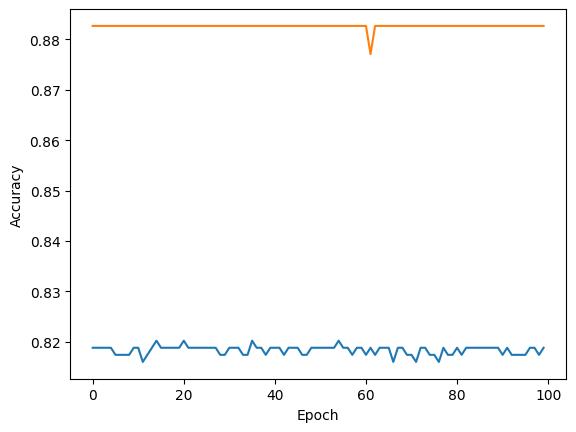

In [136]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()